# Exploring the Breast Cancer Wiscosin Dataset
## This is part of a series of introductory data science projects in exploratory data analysis (EDA) which anyone who is a beginner in the field can follow along!

In this project we will use a machine learning model - multiple linear regression. Linear regression predicts a dependent variable based upon the independent variable (simple linear regression), or in case of the multiple linear regression we can use two and more independent variables to predict the dependent variable. Scikit learn is a popular library for machine learning that allows us to use some of their datasets to explore machine learning models. This saves us some time since we don't have to extract and clean the data. These datasets though don't come in the typical dataset form. It comes in a form of a bunch object - a dictionary. We will understand this in a second. Let's first import the important libraries:

In [41]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from sklearn import datasets, metrics 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

We will load the breast cancer dataset. You could add the argument return_X_y to be False in load_breast_cancer(), so that you get the whole dataset in one variable. If you let it to be return_X_y=True, the dataset will be stored into two variables X and y.

In [80]:
breast_cancer_dataset = datasets.load_breast_cancer() 

Now let's take a look how our breast_cancer_dataset looks like - since it's a dictionary, let's look at its keys:

In [81]:
breast_cancer_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Data is what we expect our regular dataset table to look like. It has multiple columns (all independent values) that we will use to predict the dependent value. Of course we will use pandas to make it look like that, as the data is stored in a multidimensional array. The dependent value is already stored in the target key. It's an array of values. Target names gives us the columns of target, in this case it's whether the cancer is benign or not. Feature names gives us the columns of the data. Lastly, DESCR helps us describe the dataset, while the filename stores the path to the file in a csv format.

In [82]:
breast_cancer_dataset.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [83]:
breast_cancer_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [84]:
breast_cancer_dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [85]:
breast_cancer_dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Now we will try to create a data structure with our breast_cancer_dataset. We will create the df with the data key, so we will additionally add a column of the target key:

In [86]:
df = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [87]:
df['target'] = breast_cancer_dataset.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Now we will create a linear regression model. We start by creating our x (independent variables) and y value (dependent variable we will predict). Since x is usually a matrix of data values that has multiple feature variables, we use capital X. y is usually a vector - single-dimensional array, so we use lower-case y.

In [93]:
X = breast_cancer_dataset.data
y = breast_cancer_dataset.target
print(X.shape)
print(y.shape)

(569, 30)
(569,)


Now we will randomly split our dataset for two purposes: 1. training and 2. testing. The training data will be used to build our model, while the testing data will be used to identify how our model would perform on unseen data (a.k.a. in the real world). We can specify the percent of data will be used for training, and the percent of data we will use for testing:

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(426, 30)
(426,)
(143, 30)
(143,)


Now we have to create our linear regression object and train it using the training sets X_train and y_train:

In [95]:
model = LinearRegression() 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now we can predict our y value using the value of X:

In [96]:
y_predict = model.predict(X_test)
print(y_predict)

[ 0.28069634  1.16740841  0.88245277 -0.0482409   0.95672561  0.82678201
  1.15287765  0.75143953  0.16682542  0.01090349  0.96308859  0.88236518
  0.21359768  0.9622004   0.45068982  0.27446207  0.89545852  0.78800948
  0.8044377   0.74841198  0.43033569  0.65002918  1.05632227  0.81726742
  0.06582686 -0.09296362  0.68771477  0.16814676  0.9073899   0.61243659
  0.97661303  0.65892341 -0.23272095  1.00100587  0.80629594  1.11110273
  0.98387051  1.39097978  0.80959548  0.8027812   0.96349026  1.16492744
  0.86997866  0.25093017  0.92914685 -0.10173491  0.34857772  0.19784018
  0.3461171   1.01131851  0.74038589  0.69391135  0.28538216  0.82436569
  0.90910635 -0.16937791  0.33790681  1.02531689  0.78439685  1.06221454
  0.36488004  1.0303437   0.33602517  0.37595386  1.20379869  0.58678837
  0.79841513  1.25156019  0.39969824  0.62670998  1.2159447   1.12731821
  1.05286965  1.50747976  1.05357347  0.08078015  1.1521683   1.00050223
  0.26953817  0.52117343  1.11162728  0.88920783 -0

We can now try to visualize these values to see what we got:

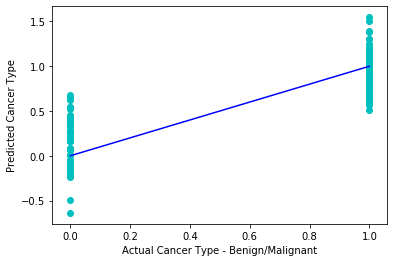

In [98]:
plt.scatter(y_test, y_predict, color = "c", marker = "o" )
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'b')
plt.xlabel('Actual Cancer Type - Benign/Malignant') 
plt.ylabel('Predicted Cancer Type') 
plt.show() 

As we can see the actual cancer type is always either benign (1) or malignant (0). Our model didn't predict the actual data perfectly as we can see some outliers. For the benign cancer the values range between 0.5 till 1.5, and for the malignant cancer the values range from -1 till 1.